In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('C:\\Users\\mk\\Desktop\\python\\train.csv')


In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])

train_year = train['datetime'].dt.year 
train_month = train['datetime'].dt.month 
train_day = train['datetime'].dt.day 
train_hour = train['datetime'].dt.hour 
train_minute = train['datetime'].dt.minute 
train_second = train['datetime'].dt.second 

train['train_year'] = train_year
train['train_month'] = train_month
train['train_day'] = train_day
train['train_hour'] = train_hour
train['train_minute'] = train_minute
train['train_second'] = train_second




<AxesSubplot:title={'center':'train_second'}, xlabel='train_second', ylabel='count'>

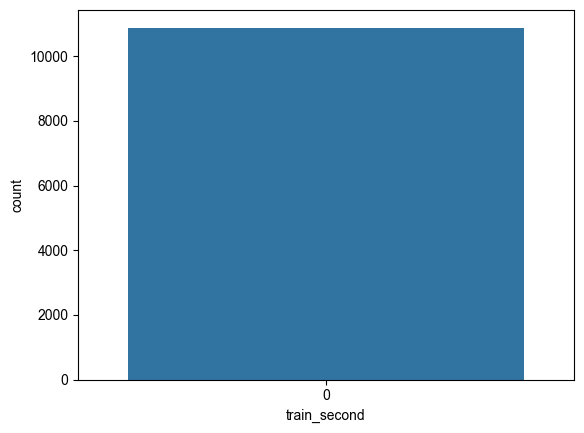

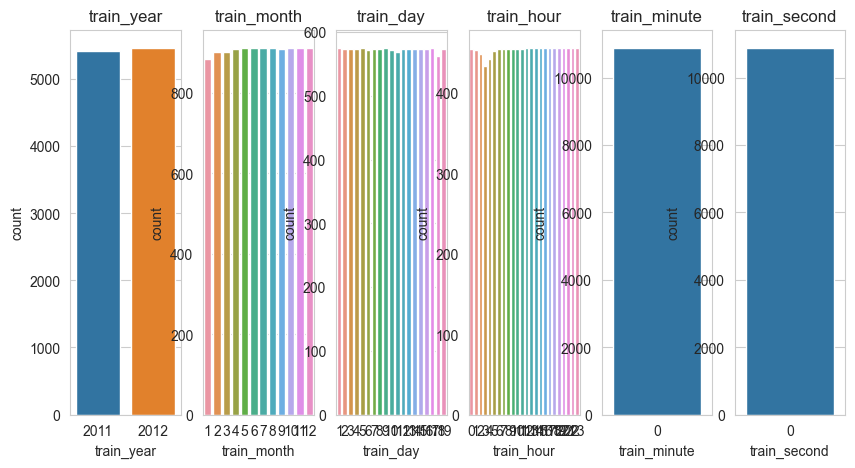

In [3]:
sns.countplot(data=train, x='train_year')
sns.countplot(data=train, x='train_month')
sns.countplot(data=train, x='train_day')
sns.countplot(data=train, x='train_hour')
sns.countplot(data=train, x='train_minute')
sns.countplot(data=train, x='train_second')
fig = plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
area01= fig.add_subplot(1,6,1)
area01.set_title('train_year')
area02= fig.add_subplot(1,6,2)
area02.set_title('train_month')
area03= fig.add_subplot(1,6,3)
area03.set_title('train_day')
area04= fig.add_subplot(1,6,4)
area04.set_title('train_hour')
area05= fig.add_subplot(1,6,5)
area05.set_title('train_minute')
area06= fig.add_subplot(1,6,6)
area06.set_title('train_second')
sns.countplot(data=train, x='train_year',ax=area01 )
sns.countplot(data=train, x='train_month', ax = area02)
sns.countplot(data=train, x='train_day', ax= area03)
sns.countplot(data=train, x='train_hour',ax= area04)
sns.countplot(data=train, x='train_minute',ax= area05)
sns.countplot(data=train, x='train_second',ax= area06)
#plt.subplot_tool()
#plt.show()

In [4]:

X= train[['train_year','train_month','train_day','train_hour','train_minute','train_second','season','holiday','workingday','weather','temp','atemp','humidity','windspeed']].values
y= train[['count']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)



In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions)

[[248.10627003]
 [ 48.79765547]
 [200.90676727]
 ...
 [309.7528022 ]
 [ 38.17030198]
 [243.62697388]]


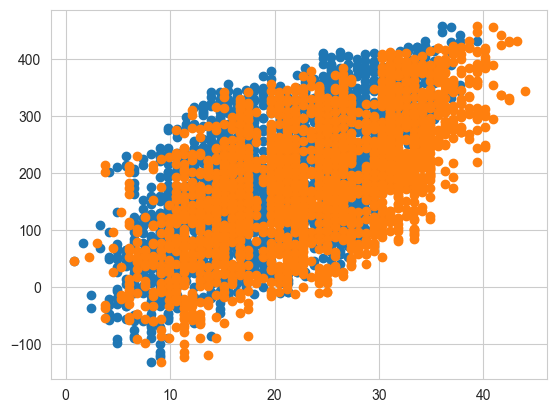

In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

rmse = mse**0.5

#(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
plt.scatter(X_test[:,10], predictions)
plt.scatter(X_test[:,11], predictions)

plt.show()